In [1]:
import numpy as np
import pandas as pd
import sys
import os
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#leer datos
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
curva = pd.read_csv('MedFisicas.csv')

In [3]:
#leer datos
#entradas = pd.read_csv('Entradas02.csv')
X_train.shape

(672, 121)

In [4]:
X_test.shape

(168, 121)

In [5]:
X_train=X_train*100000000000
X_test=X_test*100000000000
curva=curva*1000000000

In [6]:
from numpy.core.fromnumeric import amax
mtrain=amax(np.array(X_train))
mtrain

0.0536

In [7]:
mtest=amax(np.array(X_test))
mtest

0.050699999999999995

In [8]:
mcurva=amax(np.array(curva))
mcurva

0.0956

In [9]:
#leer salidas
#salidas = pd.read_csv('Salidas02Mx.csv')

In [10]:
#salidas.shape

In [11]:
#dividir el 80%20 para entrenamiento y datos de validacion
#X_train, X_test, Y_train, Y_test = train_test_split(entradas,salidas, test_size=0.20)

In [12]:
#Convertir a valores numéricos de numpy
#X_train = np.matrix(X_train)
#X_test = np.matrix(X_test)
#Y_train = np.matrix(Y_train)
#Y_test = np.matrix(Y_test)

In [13]:
#limpiar modelo
#clear_session()
#del model

In [14]:
model = Sequential()
#Definir cada una de las capas
model.add(Dense(256,activation='relu',use_bias=True,input_shape=(121,)))
model.add(Dense(128,activation='relu',use_bias=True))
model.add(Dense(64,activation='relu',use_bias=True))
model.add(Dense(32,activation='relu',use_bias=True))
model.add(Dense(16,activation='relu',use_bias=True))
model.add(Dense(3,activation='linear',use_bias=True))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               31232     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 75,043
Trainable params: 75,043
Non-traina

In [15]:
Adam = optimizers.Adam(learning_rate=0.01, beta_1= 0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='mean_squared_error', optimizer=Adam, metrics=['accuracy'])

In [16]:
#correr entrenamiento
#Iniciamos a contar tiempo
inicio = time.time()
M= model.fit(X_train, y_train, epochs=1000, verbose=1,validation_data=(X_test,y_test), shuffle=True)
fin=time.time()

Epoch 1/1000
21/21 [==============================] - 4s 17ms/step - loss: 0.1766 - accuracy: 0.3661 - val_loss: 0.0808 - val_accuracy: 0.4821
Epoch 2/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.0693 - accuracy: 0.4315 - val_loss: 0.0712 - val_accuracy: 0.4821
Epoch 3/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.0660 - accuracy: 0.4583 - val_loss: 0.0678 - val_accuracy: 0.4821
Epoch 4/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.0652 - accuracy: 0.4583 - val_loss: 0.0696 - val_accuracy: 0.4821
Epoch 5/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.0640 - accuracy: 0.4583 - val_loss: 0.0658 - val_accuracy: 0.4821
Epoch 6/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.0611 - accuracy: 0.5967 - val_loss: 0.0652 - val_accuracy: 0.6548
Epoch 7/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.0559 - accuracy: 0.6726 - val_loss: 0.0551 - val_accuracy: 0.6786
Epoch

In [17]:
print("El tiempo del RF fue de:",fin-inicio)

El tiempo del RF fue de: 162.56295657157898


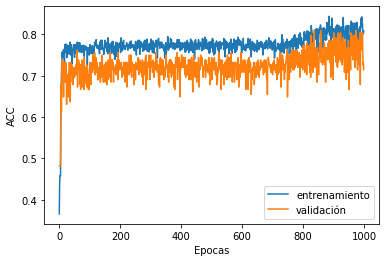

In [18]:
plt.plot(M.history['accuracy'], label='entrenamiento')
plt.plot(M.history['val_accuracy'], label='validación')
plt.legend(loc='lower right')
plt.xlabel('Epocas')
plt.ylabel('ACC')
plt.show()

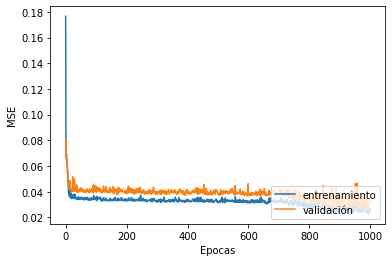

In [19]:
plt.plot(M.history['loss'], label='entrenamiento')
plt.plot(M.history['val_loss'], label='validación')
plt.legend(loc='lower right')
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.show()

In [20]:
model.evaluate(X_train,y_train)

21/21 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.7917


[0.026705943048000336, 0.7916666865348816]

In [21]:
predicciones_train=model.predict(X_train)
r2_train = r2_score(y_train,predicciones_train)
print("El r2 de tu modelo en entrenamiento es:", r2_train)

21/21 [==============================] - 0s 2ms/step
El r2 de tu modelo en entrenamiento es: 0.7428294838602776


In [22]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.7143


[0.03493170812726021, 0.7142857313156128]

In [23]:
predicciones_test=model.predict(X_test)
r2_test = r2_score(y_test,predicciones_test)
print("El r2 de tu modelo en entrenamiento es:", r2_test)

6/6 [==============================] - 0s 2ms/step
El r2 de tu modelo en entrenamiento es: 0.686923835269131


In [24]:
#Convertir a valores numéricos de numpy
X_train = np.matrix(X_train)
X_test = np.matrix(X_test)
y_train = np.matrix(y_train)
y_test = np.matrix(y_test)

6/6 [==============================] - 0s 2ms/step


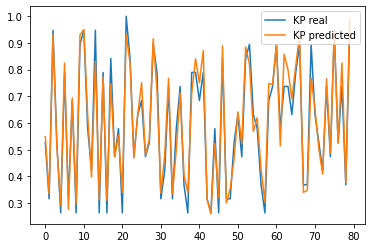

In [25]:
plt.plot(y_test[0:80,0], label='KP real')
plt.plot(model.predict(X_test)[0:80,0], label='KP predicted')
plt.legend(loc='upper right')
plt.show()

6/6 [==============================] - 0s 2ms/step


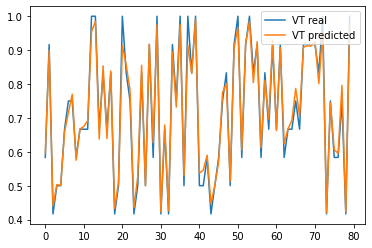

In [26]:
plt.plot(y_test[0:80,1], label='VT real')
plt.plot(model.predict(X_test)[0:80,1], label='VT predicted')
plt.legend(loc='upper right')
plt.show()

6/6 [==============================] - 0s 2ms/step


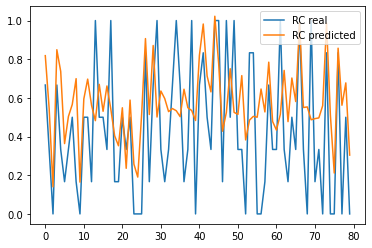

In [27]:
plt.plot(y_test[0:80,2], label='RC real')
plt.plot(model.predict(X_test)[0:80,2], label='RC predicted')
plt.legend(loc='upper right')
plt.show()

21/21 [==============================] - 0s 2ms/step


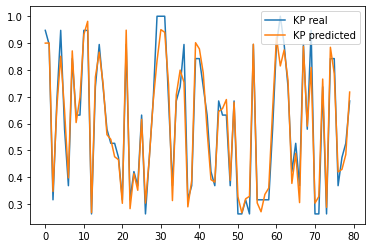

In [28]:
plt.plot(y_train[0:80,0], label='KP real')
plt.plot(model.predict(X_train)[0:80,0], label='KP predicted')
plt.legend(loc='upper right')
plt.show()

21/21 [==============================] - 0s 3ms/step


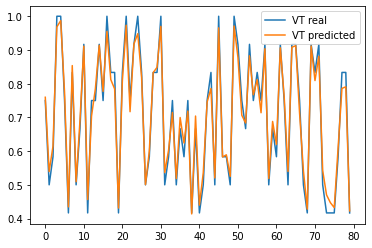

In [29]:
plt.plot(y_train[0:80,1], label='VT real')
plt.plot(model.predict(X_train)[0:80,1], label='VT predicted')
plt.legend(loc='upper right')
plt.show()

21/21 [==============================] - 0s 3ms/step


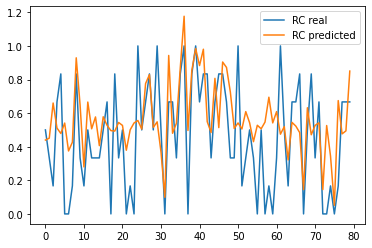

In [30]:
plt.plot(y_train[0:80,2], label='RC real')
plt.plot(model.predict(X_train)[0:80,2], label='RC predicted')
plt.legend(loc='upper right')
plt.show()

In [31]:
salidaNet=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [32]:
#Convertir a valores numéricos de numpy
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [33]:
#--------------------------------------------------
#Cargamos por separado los datos
UOreal = (y_test)[:,0]
UOnet =(salidaNet)[:,0]
VTreal = (y_test)[:,1]
VTnet = (salidaNet)[:,1]
RCreal=(y_test)[:,2]
RCnet = (salidaNet)[:,2]

In [34]:
#---------------------------------------------
#MSE de UO
rmse = mean_squared_error(
        y_true  = UOreal,
        y_pred  = UOnet,
        squared = False
       )
print(f"El error (rmse) de UO es: {rmse}")

El error (rmse) de UO es: 0.05421565771301218


In [35]:
#---------------------------------------------
#R2 de UO 
r2_netUO = r2_score(UOreal,UOnet)
print("El r2 de la red para UO es:", r2_netUO)

El r2 de la red para UO es: 0.9427588537024504


In [36]:
#---------------------------------------------
#MSE de VT 
rmse = mean_squared_error(
        y_true  = VTreal,
        y_pred  = VTnet,
        squared = False
       )
print(f"El error (rmse) de VT es: {rmse}")

El error (rmse) de VT es: 0.026990916585284776


In [37]:
#---------------------------------------------
#R2 de VT 
r2_netVT = r2_score(VTreal,VTnet)
print("El r2 de la red para VT es:", r2_netVT)

El r2 de la red para VT es: 0.9808422499710994


In [38]:
#---------------------------------------------
#MSE de RC 
rmse = mean_squared_error(
        y_true  = RCreal,
        y_pred  = RCnet,
        squared = False
       )
print(f"El error (rmse) de RC es: {rmse}")

El error (rmse) de RC es: 0.31800515666732093


In [39]:
#---------------------------------------------
#R2 de RC 
r2_netRC = r2_score(RCreal,RCnet)
print("El r2 de la red para RC es:", r2_netRC)

El r2 de la red para RC es: 0.13717040213384335


In [40]:
salidaNetdf=pd.DataFrame(salidaNet)
salidaNetdf.reset_index().to_csv('salidaModelo1.csv',header=True,index=False)

In [41]:
salida = model.predict(curva)

1/1 [==============================] - 0s 28ms/step


In [42]:
salidadf=pd.DataFrame(salida)
salidadf.reset_index().to_csv('saliCurvExp1.csv',header=True,index=False)

In [43]:
dir='./modelo/'
if not os.path.exists(dir):
  os.mkdir(dir)
model.save('./modelo/modelo1.h5')
model.save_weights('./modelo/pesosm1.h5')